In [11]:
import numpy as np
import pandas as pd
import statsmodels as st
import pylab as pl
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
def line (a, b, x):
    yerr = np.random.randn(len(x))
    yerr = yerr * (np.sqrt(a*x+b).mean())/5
    
    return a*x + b
x = np.random.rand(10)*10
line1 = line(5, 7, x)
line1

array([ 12.51847611,  29.16333905,  28.38642193,  47.48054571,
        49.95252439,   8.62609291,  42.83702564,  13.86854501,
        13.52100227,  54.59325841])

In [22]:
lm = smf.ols(formula = 'y~x', data = dfline).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.062e+31
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          8.81e-122
Time:                        11:08:09   Log-Likelihood:                 305.96
No. Observations:                  10   AIC:                            -607.9
Df Residuals:                       8   BIC:                            -607.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0000    1.1e-14   6.39e+14      0.000         7.000     7.000
x              5.0000   1.53e-15   3.26e+15      0.000         5.000     5.000
==============================================================================
Omnibus:                        2.741   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                1.083
Skew:                           0.353   Prob(JB):                        0.582
Kurtosis:                       1.550   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

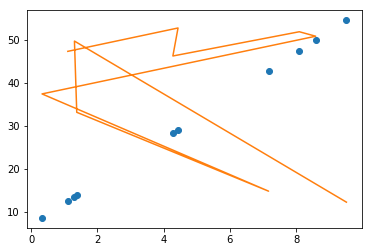

In [23]:
df = pd.DataFrame({'x':x, 'y': line1})
pl.plot(x, line1, 'o')
pl.plot(df.x, lm.predict())

In [24]:
lm2 = smf.ols(formula = 'y~I(x**2)+x', data = dfline).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.726e+30
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.79e-106
Time:                        11:08:14   Log-Likelihood:                 307.01
No. Observations:                  10   AIC:                            -608.0
Df Residuals:                       7   BIC:                            -607.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0000   1.61e-14   4.34e+14      0.000         7.000     7.000
I(x ** 2)  -2.776e-17   7.55e-16     -0.037      0.972     -1.81e-15  1.76e-15
x              5.0000    7.9e-15   6.33e+14      0.000         5.000     5.000
==============================================================================
Omnibus:                       13.263   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       1.000   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(-2*(-29.052+29.044))

0.016


In [26]:
lm2.compare_lr_test(lm)

(2.0904462693470123, 0.14822276661148212, 1.0)